### 逻辑回归

In [1]:
!ls datasets/

datingTestSet.txt  email  play	testSet.txt


#### 书上实例

In [1]:
import numpy as np
import pandas as pd

In [2]:
# loaddataset
def load_dataset(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None).to_numpy()
    return data[:, :-1], data[:, -1]

In [3]:
file = 'datasets/testSet.txt'
X, y = load_dataset(file)

In [21]:
X,y

(array([[-1.7612000e-02,  1.4053064e+01],
        [-1.3956340e+00,  4.6625410e+00],
        [-7.5215700e-01,  6.5386200e+00],
        [-1.3223710e+00,  7.1528530e+00],
        [ 4.2336300e-01,  1.1054677e+01],
        [ 4.0670400e-01,  7.0673350e+00],
        [ 6.6739400e-01,  1.2741452e+01],
        [-2.4601500e+00,  6.8668050e+00],
        [ 5.6941100e-01,  9.5487550e+00],
        [-2.6632000e-02,  1.0427743e+01],
        [ 8.5043300e-01,  6.9203340e+00],
        [ 1.3471830e+00,  1.3175500e+01],
        [ 1.1768130e+00,  3.1670200e+00],
        [-1.7818710e+00,  9.0979530e+00],
        [-5.6660600e-01,  5.7490030e+00],
        [ 9.3163500e-01,  1.5895050e+00],
        [-2.4205000e-02,  6.1518230e+00],
        [-3.6453000e-02,  2.6909880e+00],
        [-1.9694900e-01,  4.4416500e-01],
        [ 1.0144590e+00,  5.7543990e+00],
        [ 1.9852980e+00,  3.2306190e+00],
        [-1.6934530e+00, -5.5754000e-01],
        [-5.7652500e-01,  1.1778922e+01],
        [-3.4681100e-01, -1.678730

In [25]:
# file
def get_data(file):
    X=[]
    y=[]
    with open(file) as f:
        for line in f.readlines():
            line_arr=line.strip().split('\t')
            X.append([line_arr[0],line_arr[1]])
            y.append(line_arr[2])
    return X,y

In [27]:
get_data(file)[1]

['0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0']

In [4]:
def sigmoid(z):
    """
    sigmoid function
    """
    return 1.0/(1+np.exp(-z))

In [5]:
# x0=1.0
X=np.column_stack((np.ones(len(X)),X))
X[:10]

array([[ 1.      , -0.017612, 14.053064],
       [ 1.      , -1.395634,  4.662541],
       [ 1.      , -0.752157,  6.53862 ],
       [ 1.      , -1.322371,  7.152853],
       [ 1.      ,  0.423363, 11.054677],
       [ 1.      ,  0.406704,  7.067335],
       [ 1.      ,  0.667394, 12.741452],
       [ 1.      , -2.46015 ,  6.866805],
       [ 1.      ,  0.569411,  9.548755],
       [ 1.      , -0.026632, 10.427743]])

In [5]:
def grad_ascent(X, y, alpha=0.001, max_cycles=500):
    X = np.mat(X) # 100 *3
    y = np.mat(y).T # 100*1
    m, n = X.shape
    weights = np.ones((n, 1)) # 3*1
    for i in range(max_cycles):
        # w^T * x +b
        h = sigmoid(X * weights)
        error = y - h
        # 3*100 100*1
        weights += alpha * X.T * error
    return weights

In [43]:
weights=grad_ascent(X,y)
weights

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

In [6]:
from matplotlib import pyplot as plt


%matplotlib inline
def plot_best_fit(X, y, weights):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X[y == 1, 1], X[y == 1, 2], s=30, c='red', marker='s')
    ax.scatter(X[y == 0, 1], X[y == 0, 2], s=30, c='green')
    x0 = np.arange(-3.0, 3.0, 0.1)
    y0 = (-weights[0] - weights[1] * x0) / weights[2]
    ax.plot(x0, y0)
    plt.xlabel('X1')
    plt.ylabel('X2')

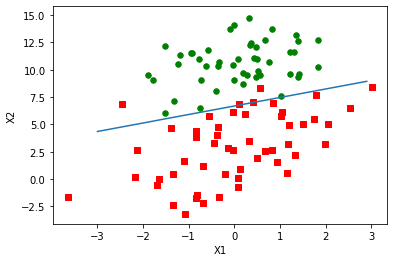

In [46]:
plot_best_fit(X,y,weights)

In [7]:
# 随机梯度上升 一次仅采用一个样本点更新回归系数
def stoc_grad_ascent0(X, y, alpha=0.01, max_cycles=500):
    # X = np.mat(X) # 100 *3
    # y = np.mat(y).T # 100*1
    m, n = X.shape
    weights = np.ones(n) # 3
    for i in range(m):
        # w^T * x +b
        h = sigmoid(np.sum(X[i] * weights))
        error = y[i] - h
        # 3 
        weights += alpha * X[i] * error
    return weights

In [48]:
stoc_grad_ascent0(X,y)

array([0.963951  , 0.9826866 , 0.49153886])

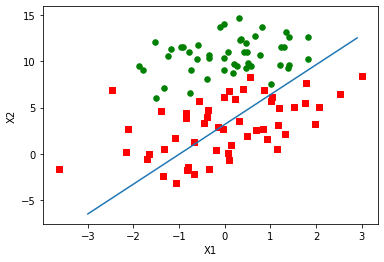

In [8]:
plot_best_fit(X,y,stoc_grad_ascent0(X,y,0.004))

In [ ]:
# 测算迭代时间图


In [9]:
# 根据迭代收敛看出，可调整alpha为随机值
def stoc_grad_ascent1(X, y, num_iter=150):
    m, n = X.shape
    weights = np.ones(n)
    for j in range(num_iter):
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            # [`low`, `high`)
            rand_index = np.random.randint(0, m)
            h = sigmoid(np.sum(X[rand_index] * weights))
            error = y[rand_index] - h
            weights += alpha * X[rand_index] * error
    return weights

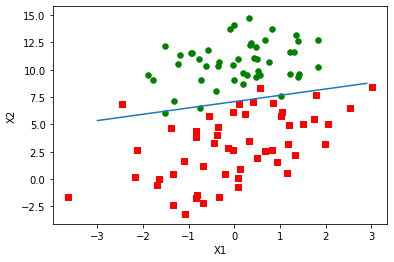

In [10]:
plot_best_fit(X,y,stoc_grad_ascent1(X,y))

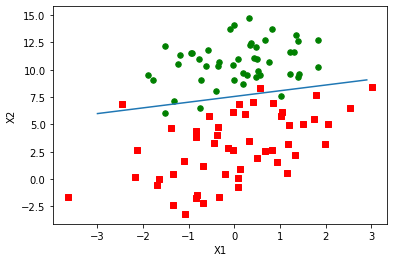

In [11]:
# iter 500
plot_best_fit(X,y,stoc_grad_ascent1(X,y,num_iter=500))

In [12]:
#### 实例 从疝气病症预测病马的死亡率

In [14]:
! head -n 2 datasets/horseColicTraining.txt

In [30]:
train_data=pd.read_csv("datasets/horseColicTraining.txt",sep='\t',header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,0.0,2.0,5.0,...,0.0,0.0,0.0,3.0,5.0,45.0,8.4,0.0,0.0,0.0
1,1.0,1.0,39.2,88.0,20.0,0.0,0.0,4.0,1.0,3.0,...,0.0,0.0,0.0,4.0,2.0,50.0,85.0,2.0,2.0,0.0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,0.0,0.0,0.0,1.0,1.0,33.0,6.7,0.0,0.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,1.0,2.0,5.0,3.0,0.0,48.0,7.2,3.0,5.3,0.0
4,2.0,1.0,37.3,104.0,35.0,0.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74.0,7.4,0.0,0.0,0.0


In [31]:
test_data=pd.read_csv("datasets/horseColicTest.txt",sep='\t',header=None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2,1,38.5,54,20,0,1,2,2,3,...,2,2,5.9,0,2,42.0,6.3,0,0.0,1
1,2,1,37.6,48,36,0,0,1,1,0,...,0,0,0.0,0,0,44.0,6.3,1,5.0,1
2,1,1,37.7,44,28,0,4,3,2,5,...,1,1,0.0,3,5,45.0,70.0,3,2.0,1
3,1,1,37.0,56,24,3,1,4,2,4,...,1,1,0.0,0,0,35.0,61.0,3,2.0,0
4,2,1,38.0,42,12,3,0,3,1,1,...,0,0,0.0,0,2,37.0,5.8,0,0.0,1


In [24]:
def classify_vector(z,weights):
    prob=sigmoid(np.sum(z*weights))
    return 1 if prob>0.5 else 0

In [32]:
# 合并训练集和测试集
train_data=train_data.to_numpy()
test_data=test_data.to_numpy()

In [29]:
X_train,y_train=train_data[:,:-1],train_data[:,-1]
X_train,y_train

(array([[ 2. ,  1. , 38.5, ...,  8.4,  0. ,  0. ],
        [ 1. ,  1. , 39.2, ..., 85. ,  2. ,  2. ],
        [ 2. ,  1. , 38.3, ...,  6.7,  0. ,  0. ],
        ...,
        [ 1. ,  1. , 37.5, ...,  6.8,  0. ,  0. ],
        [ 1. ,  1. , 36.5, ...,  6. ,  3. ,  3.4],
        [ 1. ,  1. , 37.2, ..., 62. ,  1. ,  1. ]]),
 array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
        1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
        1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
        1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,

In [33]:
X_test,y_test=test_data[:,:-1],test_data[:,-1]
X_test,y_test

(array([[ 2. ,  1. , 38.5, ...,  6.3,  0. ,  0. ],
        [ 2. ,  1. , 37.6, ...,  6.3,  1. ,  5. ],
        [ 1. ,  1. , 37.7, ..., 70. ,  3. ,  2. ],
        ...,
        [ 1. ,  1. , 38. , ..., 65. ,  3. ,  2. ],
        [ 2. ,  1. , 38. , ...,  5.8,  0. ,  0. ],
        [ 2. ,  1. , 37.6, ...,  6. ,  0. ,  0. ]]),
 array([1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.]))

In [34]:
train_weights=stoc_grad_ascent1(X_train,y_train,num_iter=500)
train_weights

/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


array([ 44.5557512 ,  -4.07561529,   2.36244392,  -0.93072483,
         0.56617158, -11.97522686,  -4.31511345, -17.48562802,
         1.31975263, -15.72426867,  25.34898371, -11.56106191,
        34.20705785,  -4.97572371,  -9.05918492,  11.67340908,
        -7.98989052,  -0.71299862,   1.24079454,  -1.67173241,
        -8.25610897])

In [39]:
y_pred=np.array([classify_vector(x,train_weights) for x in X_test])
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1])

In [40]:
y_test==y_pred

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True, False])

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.65      0.58        20
         1.0       0.83      0.74      0.79        47

    accuracy                           0.72        67
   macro avg       0.68      0.70      0.68        67
weighted avg       0.74      0.72      0.72        67



#### 网上算法